In [1]:
import os
import pandas as pd
os.chdir('../../')
!pwd


/root/python/myenv/medical-coding-reproducibility-main


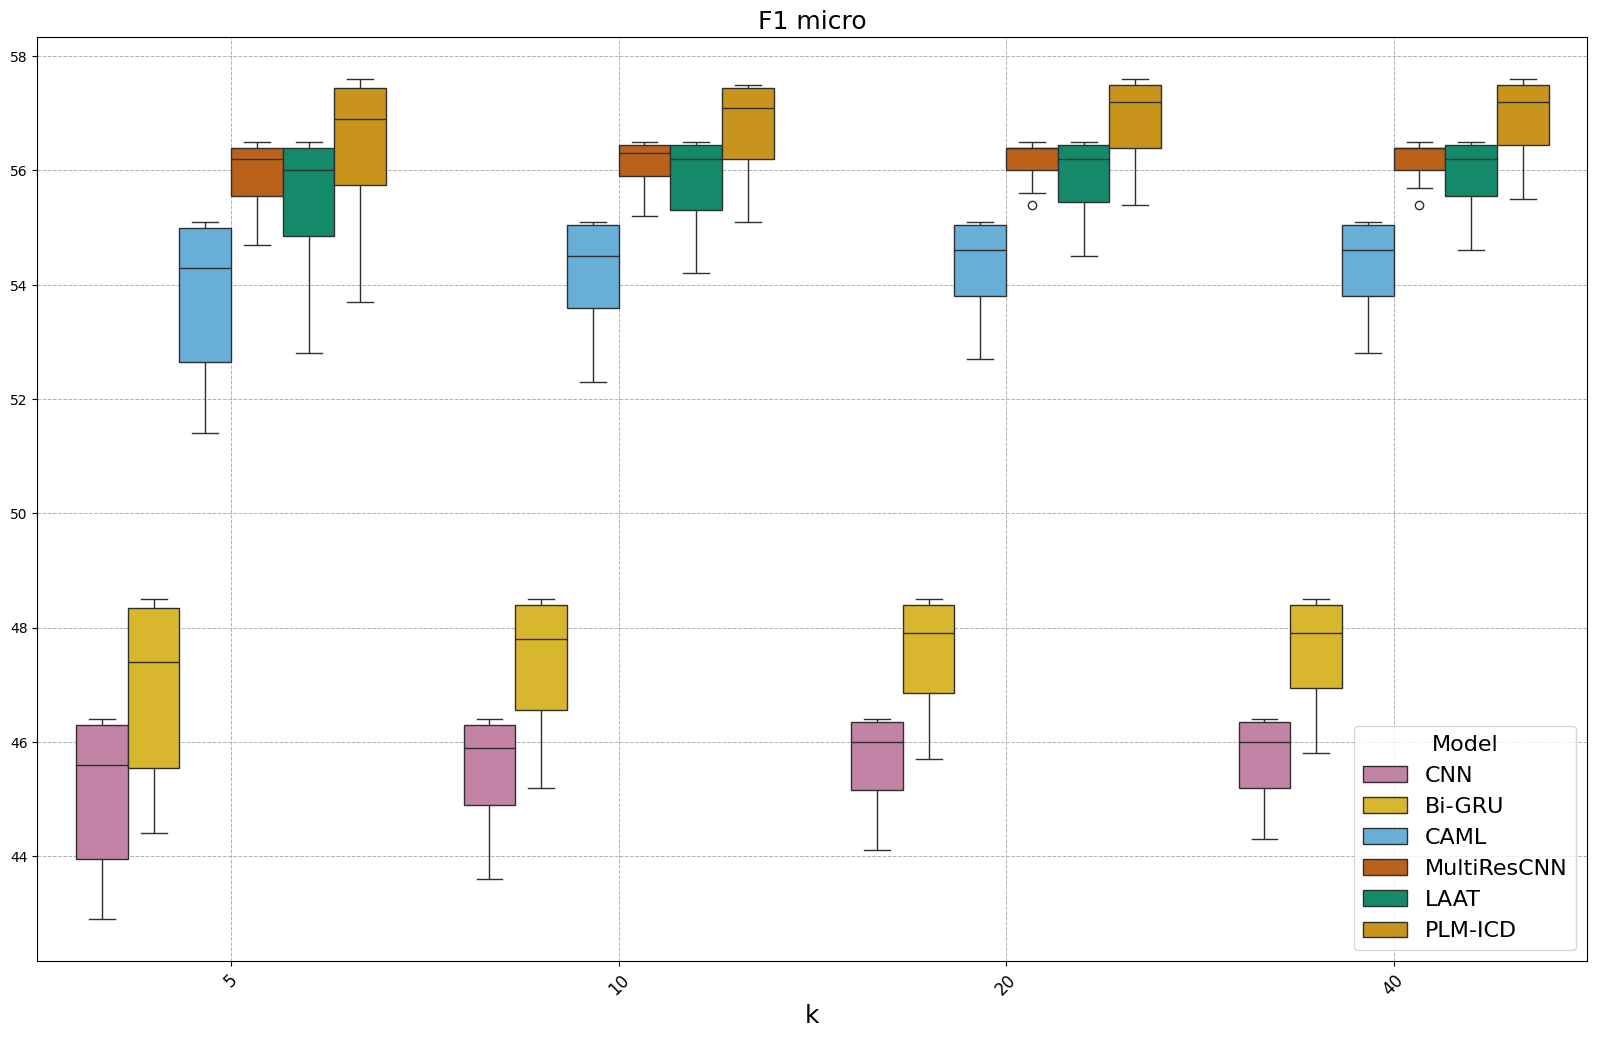

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from src.settings import PALETTE,MODEL_NAMES

df = pd.read_csv('./files/retrieval/retrieval.csv')
# Replace model names with custom names
df['model'] = df['model'].replace(MODEL_NAMES)

# Group by model and NavgTop, calculate mean and standard deviation of f1_micro
grouped_df = df.groupby(['model', 'NavgTop'])['f1_micro'].agg(['mean', 'std']).reset_index()


# Create a multi-boxplot
plt.figure(figsize=(20, 12))
sns.boxplot(x='NavgTop', y='f1_micro', hue='model', data=df,palette=PALETTE)

# Customize plot
plt.xlabel('k', fontsize=18) 
plt.ylabel('', fontsize=18)
plt.title('F1 micro', fontsize=18) 
plt.legend(title='Model',title_fontsize=16, prop={'size': 16}, loc='lower right')  # Adjust the 'size' value as needed
plt.xticks(rotation=45, fontsize=12)

# Save the image
plt.savefig('./files/retrieval/topk.png', dpi=300, bbox_inches='tight')

# Add gridlines
plt.grid(True, axis='both', linestyle='--', linewidth=0.7)
plt.show()